<a href="https://colab.research.google.com/github/joshhan619/HandsOnEgoVLP/blob/main/egovqa_handsonvlm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Setup
Clone the Github repo, download pretrained EgoVLPv2 checkpoint, download EgoTaskQA data.


In [1]:
# Clone the GitHub repo
!git clone https://github.com/joshhan619/HandsOnEgoVLP.git

Cloning into 'HandsOnEgoVLP'...
remote: Enumerating objects: 298, done.
remote: Counting objects: 100% (298/298), done.
remote: Compressing objects: 100% (190/190), done.
remote: Total 298 (delta 110), reused 281 (delta 102), pack-reused 0 (from 0)
Receiving objects: 100% (298/298), 8.35 MiB | 8.54 MiB/s, done.
Resolving deltas: 100% (110/110), done.


In [2]:
# Install packages
%cd /content/HandsOnEgoVLP/
!pip install -r requirements.txt

/content/HandsOnEgoVLP
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 29.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.7/557.7 MB 32.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.2/160.2 kB 104.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.3/27.3 MB 114.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 768.5/768.5 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 53.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 60.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 5.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 3.5 MB/s eta 

In [3]:
# Download the pretrained EgoVLPv2 checkpoint
%cd /content/HandsOnEgoVLP/EgoTaskQA
!wget https://www.cis.jhu.edu/~shraman/EgoVLPv2/ckpts/Pre-trained/EgoVLPv2.pth

/content/HandsOnEgoVLP/EgoTaskQA
--2025-03-28 18:38:00--  https://www.cis.jhu.edu/~shraman/EgoVLPv2/ckpts/Pre-trained/EgoVLPv2.pth
Resolving www.cis.jhu.edu (www.cis.jhu.edu)... 172.64.151.119, 104.18.36.137, 2606:4700:4400::ac40:9777, ...
Connecting to www.cis.jhu.edu (www.cis.jhu.edu)|172.64.151.119|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4579912049 (4.3G)
Saving to: ‘EgoVLPv2.pth’

EgoVLPv2.pth        100%[===================>]   4.26G  62.4MB/s    in 68s     

2025-03-28 18:39:09 (64.1 MB/s) - ‘EgoVLPv2.pth’ saved [4579912049/4579912049]



In [4]:
%cd /content/HandsOnEgoVLP/EgoTaskQA
!wget https://www.cis.jhu.edu/~shraman/EgoVLPv2/datasets/EgoTaskQA/qa_videos.tgz
!wget https://www.cis.jhu.edu/~shraman/EgoVLPv2/datasets/EgoTaskQA/Data.tgz
!tar -xzf qa_videos.tgz && rm qa_videos.tgz
!tar -xzf Data.tgz && rm Data.tgz
!wget https://www.cis.jhu.edu/~shraman/EgoVLPv2/datasets/EgoTaskQA/reasoning_unique_cat.pth

/content/HandsOnEgoVLP/EgoTaskQA
--2025-03-28 18:39:09--  https://www.cis.jhu.edu/~shraman/EgoVLPv2/datasets/EgoTaskQA/qa_videos.tgz
Resolving www.cis.jhu.edu (www.cis.jhu.edu)... 172.64.151.119, 104.18.36.137, 2606:4700:4400::6812:2489, ...
Connecting to www.cis.jhu.edu (www.cis.jhu.edu)|172.64.151.119|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15259979543 (14G) [application/x-gzip]
Saving to: ‘qa_videos.tgz’

qa_videos.tgz       100%[===================>]  14.21G  56.6MB/s    in 5m 1s   

2025-03-28 18:44:11 (48.4 MB/s) - ‘qa_videos.tgz’ saved [15259979543/15259979543]

--2025-03-28 18:44:11--  https://www.cis.jhu.edu/~shraman/EgoVLPv2/datasets/EgoTaskQA/Data.tgz
Resolving www.cis.jhu.edu (www.cis.jhu.edu)... 172.64.151.119, 104.18.36.137, 2606:4700:4400::ac40:9777, ...
Connecting to www.cis.jhu.edu (www.cis.jhu.edu)|172.64.151.119|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22504600 (21M) [application/x-gzip]
Saving to: ‘D

# 2. Dataset Exploration (EgoTaskQA)

In [2]:
%cd /content/HandsOnEgoVLP/EgoTaskQA/
from EgoTaskQA_dataset import EgoTaskQA, collate_func
from transforms import init_transform_dict, init_video_transform_dict
from torch.utils.data import DataLoader
import torch
import numpy as np
import argparse

args = {
    "dataset_split_type": "direct",
    "model_name": "EgoVLPv2.pth",
    "per_gpu_batch_size": 8,
    "num_frames_per_video": 16,
    "frame_resolution": 224,
    "lr": 2e-4,
    "ngpus_per_node": torch.cuda.device_count(),
    "dist_url": 'tcp://localhost:58472',
}
args = argparse.Namespace(**args)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

torch.backends.cudnn.benchmark = True

dataset_test = EgoTaskQA(dataset_name="EgoTaskQA", text_params={"input": "text"},
                                  video_params={"input_res": args.frame_resolution,
                                                "num_frames": args.num_frames_per_video,
                                                "loading": "lax"},
                                  data_dir="./qa_videos",
                                  meta_dir="./Data/qa/" + args.dataset_split_type,
                                  tsfms=init_video_transform_dict()['test'], reader='decord', split='test', neg_param=60, args=args)

sampler_test = torch.utils.data.RandomSampler(dataset_test)
dataloader_test = DataLoader(dataset_test, batch_size=args.per_gpu_batch_size, drop_last=False, sampler=sampler_test, collate_fn=collate_func)

print(f"Test dataset size: {len(dataset_test)}")

/content/HandsOnEgoVLP/EgoTaskQA
Video Transform is used!


/usr/local/lib/python3.11/dist-packages/torchvision/transforms/_functional_video.py:6: UserWarning: The 'torchvision.transforms._functional_video' module is deprecated since 0.12 and will be removed in the future. Please use the 'torchvision.transforms.functional' module instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/transforms/_transforms_video.py:22: UserWarning: The 'torchvision.transforms._transforms_video' module is deprecated since 0.12 and will be removed in the future. Please use the 'torchvision.transforms' module instead.
  warnings.warn(


Test dataset size: 8783


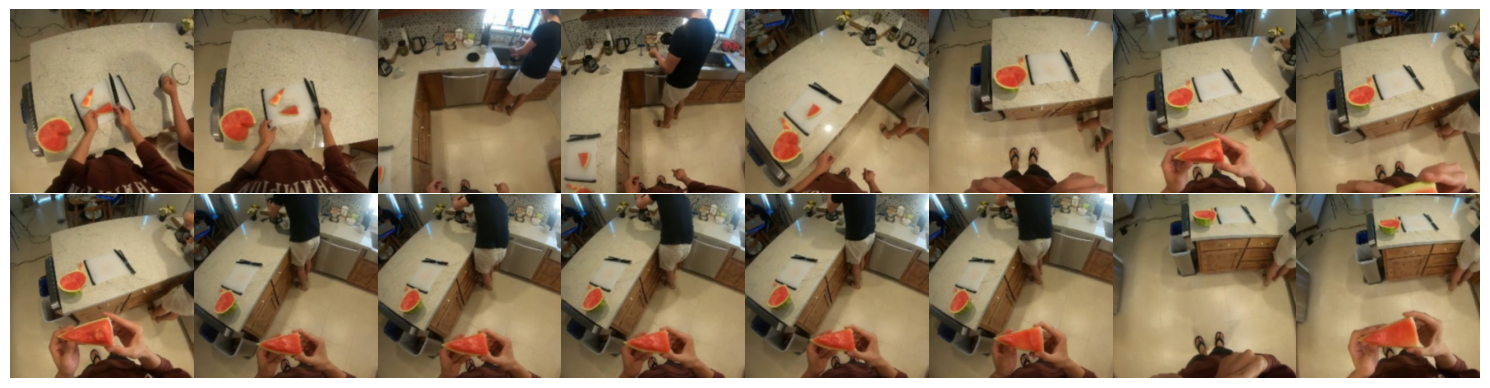

Sample question: If the person did not put something to something, is the person able to do the last action in the video?
Question metadata:
	Type: ['counterfactual']
	Category: ['world']
	Semantic: action
	Reasoning: ['counterfactual', 'world', 'action', 'verify', 'indirect']
Answer: on top of plate


In [3]:
import matplotlib.pyplot as plt
import torch

# Show a sample's video frames
index = 100
sample = dataset_test[100]
nrows = (args.num_frames_per_video+1)//2
fig, ax = plt.subplots(2, nrows, figsize=(15,4))

norm_mean=torch.tensor((0.485, 0.456, 0.406))
norm_std=torch.tensor((0.229, 0.224, 0.225))

for i in range(args.num_frames_per_video):
    frame = sample["video"][i, :, :, :]
    frame = frame*norm_std.view(-1, 1, 1) + norm_mean.view(-1, 1, 1) # Unnormalize
    row = i//nrows
    col = i%nrows
    ax[row, col].imshow(frame.permute(1, 2, 0))
    ax[row, col].axis('off')
    ax[row, col].set_xticklabels = []
    ax[row, col].set_yticklabels = []

fig.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

print(f"Sample question: {sample['text']}")
print(f"Question metadata:")
print(f"\tType: {sample['meta']['type']}")
print(f"\tCategory: {sample['meta']['category']}")
print(f"\tSemantic: {sample['meta']['semantic']}")
print(f"\tReasoning: {sample['meta']['reasoning']}")
print(f"Answer: {dataset_test.metadata['answer'][sample['answer']]}")

In [7]:
# Load finetuned checkpoint for EgoVLPv2 on EgoTaskQA
%cd /content/HandsOnEgoVLP/EgoTaskQA
!wget https://www.cis.jhu.edu/~shraman/EgoVLPv2/ckpts/EgoTaskQA_Finetuned/EgoTaskQA_finetune_direct.tar

/content/HandsOnEgoVLP/EgoTaskQA
--2025-03-28 18:47:51--  https://www.cis.jhu.edu/~shraman/EgoVLPv2/ckpts/EgoTaskQA_Finetuned/EgoTaskQA_finetune_direct.tar
Resolving www.cis.jhu.edu (www.cis.jhu.edu)... 104.18.36.137, 172.64.151.119, 2606:4700:4400::ac40:9777, ...
Connecting to www.cis.jhu.edu (www.cis.jhu.edu)|104.18.36.137|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3604232437 (3.4G) [application/x-tar]
Saving to: ‘EgoTaskQA_finetune_direct.tar’

EgoTaskQA_finetune_ 100%[===================>]   3.36G  45.6MB/s    in 57s     

2025-03-28 18:48:48 (60.5 MB/s) - ‘EgoTaskQA_finetune_direct.tar’ saved [3604232437/3604232437]



In [4]:
import torch
import time
from tqdm import tqdm
from torch import nn

def validate(model, val_dataloader, epoch, args, gpu, acc_calculator):
    model.eval()
    all_acc = 0
    all_loss = 0
    acc_calculator.reset()

    print('validating...')
    unique_dict = torch.load('./reasoning_unique_cat.pth')
    with torch.no_grad():
        starttime = time.time()
        for idx, (video_frames, text_tokens, attention_masks, answers, reasoning_type_lst) in tqdm(enumerate(val_dataloader)):

            B, num_frame_per_video, C, H, W = video_frames.shape
            video_frames, text_tokens, attention_masks, answers = video_frames.cuda(gpu, non_blocking=True), text_tokens.cuda(gpu, non_blocking=True), attention_masks.cuda(gpu, non_blocking=True), answers.cuda(gpu, non_blocking=True)

            data_batch = {"video": video_frames, "text": {"input_ids": text_tokens, "attention_mask": attention_masks}}
            logits = model(data_batch)

            logits_all = [torch.zeros_like(logits) for _ in range(args.world_size)]
            torch.distributed.all_gather(logits_all, logits)
            logits_all = torch.cat(logits_all, dim=0)

            answers_all = [torch.zeros_like(answers) for _ in range(args.world_size)]
            torch.distributed.all_gather(answers_all, answers)
            answers_all = torch.cat(answers_all, dim=0)

            all_loss += nn.CrossEntropyLoss().cuda(gpu)(logits_all, answers_all.long())
            # print('validate finish in', (time.time() - starttime) * (len(val_loader) - i), 's')
            # starttime = time.time()
            pred_all = torch.argmax(logits_all, dim=1)
            test_acc = sum(pred_all == answers_all) / B * args.world_size
            all_acc += test_acc


            max_len = 7
            # pad all tensors to have same length
            reasoning_type_lst = [torch.nn.functional.pad(x, pad=(0, max_len - x.numel()), mode='constant', value= -100) for x in reasoning_type_lst]
            reasoning_type_lst = torch.stack(reasoning_type_lst).cuda(gpu, non_blocking=True)
            reasoning_type_lst = args.allgather(reasoning_type_lst, gpu, args)

            reasoning_lst = []

            for _i in range(reasoning_type_lst.shape[0]):
                _list = []
                for _j in range(reasoning_type_lst.shape[1]):
                    if reasoning_type_lst[_i][_j] > -100:
                        _list.append([*unique_dict.keys()][int(reasoning_type_lst[_i][_j])])
                reasoning_lst.append(_list)

            acc_calculator.update(reasoning_lst, pred_all, answers_all)


    all_loss /= len(val_dataloader)
    all_acc /= len(val_dataloader)
    model.train()
    return all_loss, all_acc

In [ ]:
%cd /content/HandsOnEgoVLP/EgoTaskQA
from model.video_qa_model_linear_end2end import FrozenInTime
from utils.util import state_dict_data_parallel_fix, ReasongingTypeAccCalculator
import json

f = open('configs/egotaskqa.json')
config = json.load(f)

video_params = {"model": config['arch']['args']['video_params']['model'], "arch_config": config['arch']['args']['video_params']['arch_config'], "num_frames": config['arch']['args']['video_params']['num_frames'], "pretrained": True, "time_init":  config['arch']['args']['video_params']['time_init']}
text_params = {"model": config['arch']['args']['text_params']['model'], "pretrained": True, "input": config['arch']['args']['text_params']['input']}
projection_dim=config['arch']['args']["projection_dim"]

if args.model_name is not None:
    load_checkpoint=args.model_name
else:
    load_checkpoint=""
projection='minimal'
load_temporal_fix='bilinear'
task_names = 'EgoNCE_ITM_MLM'
norm_layer = None
embed_dim=768

with open('./Data/qa/' + args.dataset_split_type + '/answer_set.txt', 'r') as ansf:
    answers = ansf.readlines()
    args.output_dim = len(answers)

model = FrozenInTime(video_params, text_params, projection_dim=projection_dim, load_checkpoint=load_checkpoint,
                     projection=projection, load_temporal_fix=load_temporal_fix,
                     task_names = task_names, norm_layer = norm_layer, embed_dim=embed_dim, model_dim=768, output_dim=args.output_dim)

ckpt = torch.load("EgoTaskQA_finetune_direct.tar", map_location='cpu', weights_only=False)
new_ckpt_model = state_dict_data_parallel_fix(ckpt['model_state_dict'], model.state_dict())
model.load_state_dict(new_ckpt_model)

with open('./Data/qa/' + args.dataset_split_type + '/all_reasoning_types.txt', 'r') as reasonf:
    all_reasoning_types = reasonf.readlines()
    all_reasoning_types = [item.strip() for item in all_reasoning_types]

train_acc_calculator = ReasongingTypeAccCalculator(reasoning_types=all_reasoning_types)
test_acc_calculator = ReasongingTypeAccCalculator(reasoning_types=all_reasoning_types)
test_acc_calculator.reset()
test_loss, test_acc = validate(model, dataloader_test, 0, args, device, acc_calculator=test_acc_calculator)
acc_dct = test_acc_calculator.get_acc()
if args.rank == 0:
    print("Evaluation Accuracy: ", acc_dct)

# output = model(sample)
# print(output)

/content/HandsOnEgoVLP/EgoTaskQA


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['encoder.layer.10.alpha_t2i', 'encoder.layer.10.crossattention_t2i.output.dense.bias', 'encoder.layer.10.crossattention_t2i.output.dense.weight', 'encoder.layer.10.crossattention_t2i.self.key.bias', 'encoder.layer.10.crossattention_t2i.self.key.weight', 'encoder.layer.10.crossattention_t2i.self.query.bias', 'encoder.layer.10.crossattention_t2i.self.query.weight', 'encoder.layer.10.crossattention_t2i.self.value.bias', 'encoder.layer.10.crossattention_t2i.self.value.weight', 'encoder.layer.11.alpha_t2i', 'encoder.layer.11.crossattention_t2i.output.dense.bias', 'encoder.layer.11.crossattention_t2i.output.dense.weight', 'encoder.layer.11.crossattention_t2i.self.key.bias', 'encoder.layer.11.crossattention_t2i.self.key.weight', 'encoder.layer.11.crossattention_t2i.self.query.bias', 'encoder.layer.11.crossattention_t2i.self.query.weight', 'encoder.layer.11.crossattention_t2i

######USING ATTENTION STYLE:  frozen-in-time
